# Import Packages

In [5]:
import numpy as np
import pandas as pd
from scripts import data_clean_utils
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split
from pathlib import Path


In [6]:
import dagshub
dagshub.init(repo_owner='kunal15cr', repo_name='Food-Delivery-Time-Prediction-API', mlflow=True)

Initialized MLflow to track repo "kunal15cr/Food-Delivery-Time-Prediction-API"

Repository kunal15cr/Food-Delivery-Time-Prediction-API initialized!

In [7]:
from sklearn import set_config

set_config(transform_output="pandas")

# Load the Data

In [8]:
BASE_DIR = Path().resolve().parent

DATA_PATH_DIR =  BASE_DIR / 'data' / 'raw' / 'swiggy.csv'


In [9]:
# load the data

df = pd.read_csv(DATA_PATH_DIR)

df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


# Clean Data

In [10]:
data_clean_utils.perform_data_cleaning(df)

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,0,10.0,morning,1.489846,short
45589,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,0,15.0,evening,NaN,NaN
45590,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,0,-1425.0,night,4.657195,short
45591,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,0,5.0,afternoon,6.232393,medium


In [11]:
# load the cleaned data

df = pd.read_csv('swiggy_cleaned.csv')

df

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43589,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,0,10.0,morning,1.489846,short
43590,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,0,15.0,evening,NaN,NaN
43591,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,0,-1425.0,night,4.657195,short
43592,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,0,5.0,afternoon,6.232393,medium


In [12]:
df.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'is_weekend', 'pickup_time_minutes',
       'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [13]:
# drop columns not required for model input

columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day",
                    "city_name",
                    "order_day_of_week",
                    "order_month"]

df.drop(columns=columns_to_drop, inplace=True)

df

KeyError: "['rider_id', 'restaurant_latitude', 'restaurant_longitude', 'delivery_latitude', 'delivery_longitude', 'order_date', 'order_time_hour', 'order_day', 'city_name', 'order_day_of_week', 'order_month'] not found in axis"

In [ ]:
# check for missing values

df.isna().sum()

,0
age,1854
ratings,1908
weather,525
traffic,510
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1198


In [14]:
# check for duplicates

df.duplicated().sum()

np.int64(0)

<Axes: >

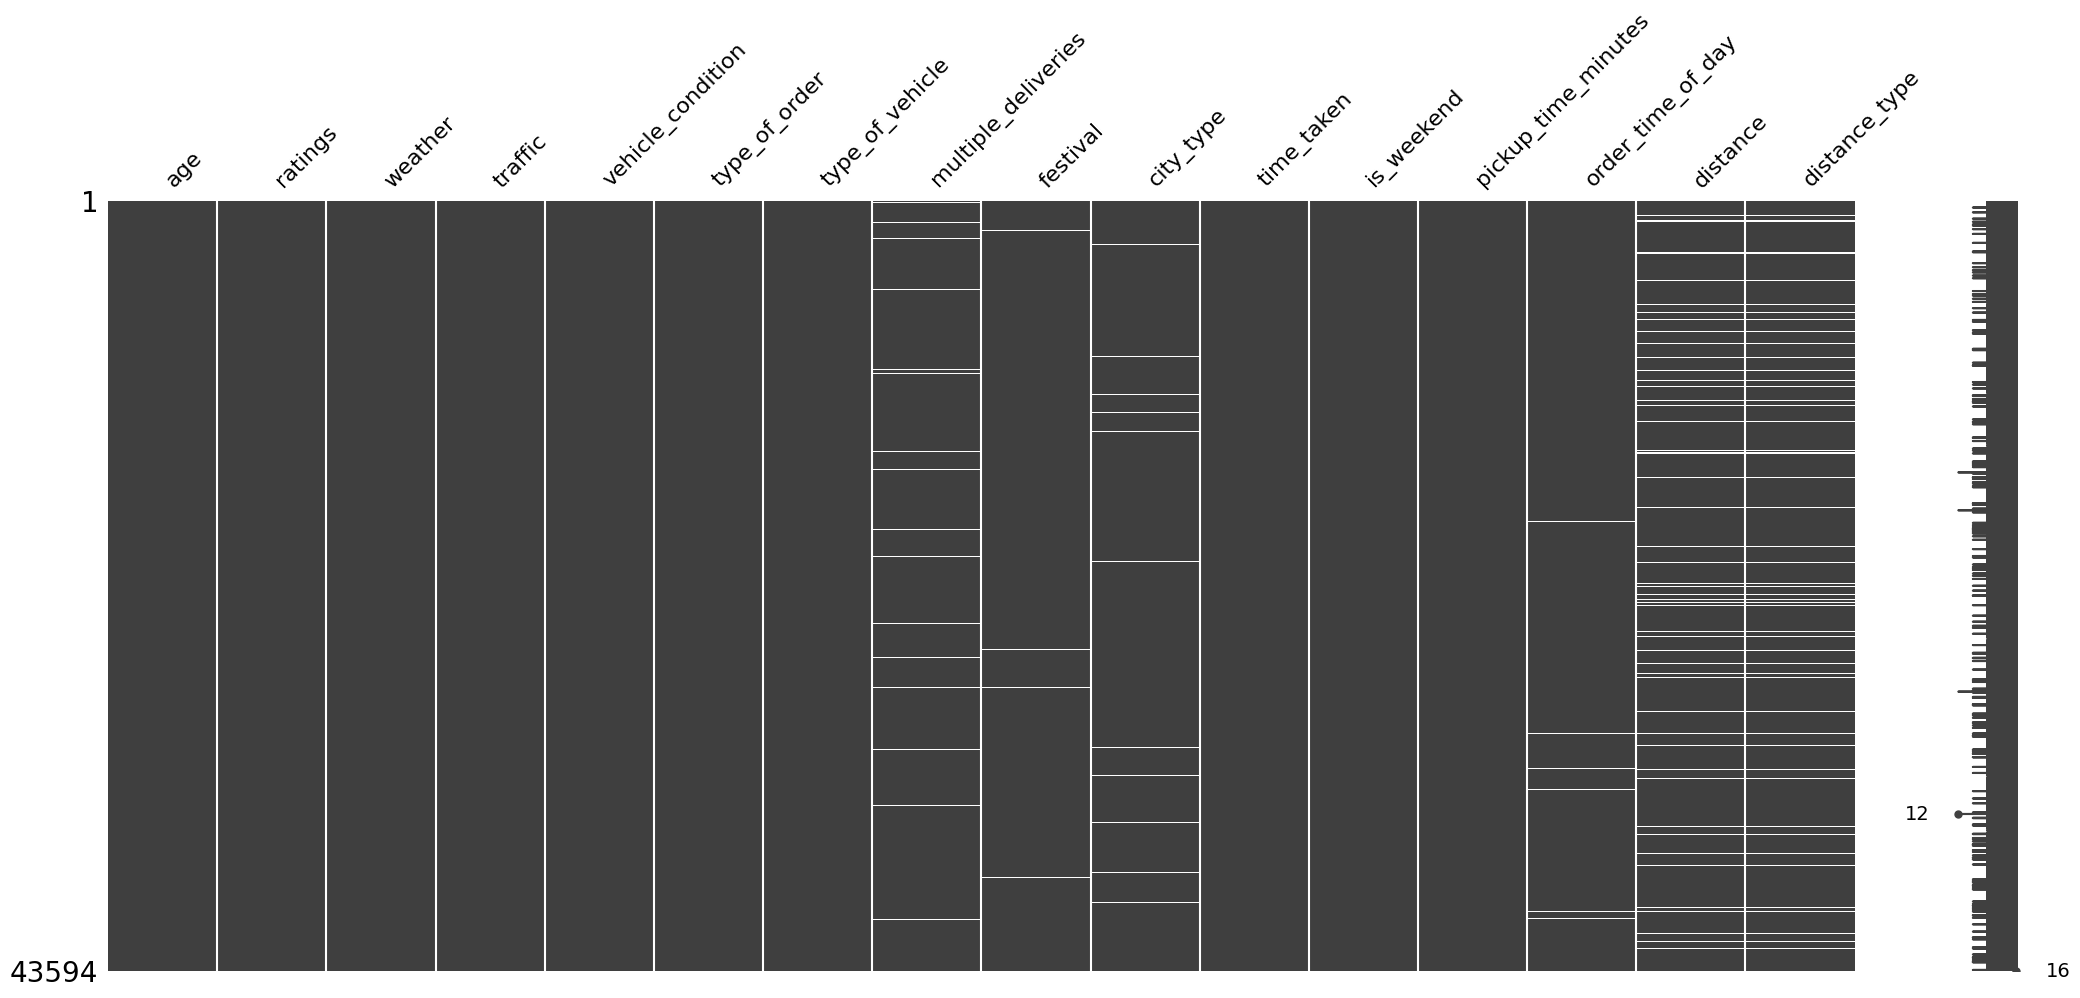

In [15]:
import missingno as msno

msno.matrix(df)

In [16]:
# columns that have missing values

missing_cols = (
                    df
                    .isna()
                    .any(axis=0)
                    .loc[lambda x: x]
                    .index
                )

missing_cols

Index(['multiple_deliveries', 'festival', 'city_type', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

# Impute Missing values

In [17]:
temp_df = df.copy()

In [18]:
# split into X and y

X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43589,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,0,10.0,morning,1.489846,short
43590,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,0,15.0,evening,NaN,NaN
43591,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,0,-1425.0,night,4.657195,short
43592,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,0,5.0,afternoon,6.232393,medium


In [19]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (34875, 15)
The shape of test data is (8719, 15)


In [21]:
# missing values in train data

X_train.isna().sum()

age                       0
ratings                   0
weather                   0
traffic                   0
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     756
festival                171
city_type               921
is_weekend                0
pickup_time_minutes       0
order_time_of_day       337
distance               2768
distance_type          2768
dtype: int64

In [22]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [23]:
missing_cols

Index(['multiple_deliveries', 'festival', 'city_type', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [24]:
# percentage of rows in data having missing values

(
    X_train
    .isna()
    .any(axis=1)
    .mean()
    .round(2) * 100
)


np.float64(13.0)

# Imputation Pipeline

In [25]:
num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather',
                    'type_of_order',
                    'type_of_vehicle',
                    "festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [26]:
nominal_cat_cols

['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'is_weekend',
 'order_time_of_day']

In [27]:
X_train.isna().sum()

age                       0
ratings                   0
weather                   0
traffic                   0
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     756
festival                171
city_type               921
is_weekend                0
pickup_time_minutes       0
order_time_of_day       337
distance               2768
distance_type          2768
dtype: int64

In [28]:
# features to fill values with mode

features_to_fill_mode = ['multiple_deliveries','festival','city_type']
features_to_fill_missing = [col for col in nominal_cat_cols if col not in features_to_fill_mode]

features_to_fill_missing

['weather',
 'type_of_order',
 'type_of_vehicle',
 'is_weekend',
 'order_time_of_day']

In [29]:
# simple imputer to fill categorical vars with mode

simple_imputer = ColumnTransformer(transformers=[
    ("mode_imputer",SimpleImputer(strategy="most_frequent",add_indicator=True),features_to_fill_mode),
    ("missing_imputer",SimpleImputer(strategy="constant",fill_value="missing",add_indicator=True),features_to_fill_missing)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

simple_imputer

,transformers,"[('mode_imputer', ...), ('missing_imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [30]:
simple_imputer.fit_transform(X_train)

d:\FInal project\Project 2\Food Delivery Time Prediction API\.venv\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


,multiple_deliveries,festival,city_type,missingindicator_multiple_deliveries,missingindicator_festival,missingindicator_city_type,weather,type_of_order,type_of_vehicle,is_weekend,order_time_of_day,missingindicator_order_time_of_day,age,ratings,traffic,vehicle_condition,pickup_time_minutes,distance,distance_type
3938,0.0,no,metropolitian,False,False,False,sunny,drinks,motorcycle,1,afternoon,False,20.0,4.8,medium,1,5.0,8.953006,medium
3252,1.0,no,metropolitian,False,False,False,sunny,buffet,scooter,0,night,False,38.0,4.4,jam,2,10.0,17.098061,very_long
40782,0.0,no,metropolitian,False,False,False,stormy,drinks,motorcycle,0,morning,False,34.0,4.4,low,0,15.0,3.108984,short
41197,1.0,no,metropolitian,False,False,False,sandstorms,buffet,scooter,1,morning,False,25.0,5.0,low,1,15.0,1.552700,short
1510,1.0,no,metropolitian,False,False,False,cloudy,snack,scooter,0,morning,False,20.0,5.0,high,2,15.0,3.064487,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.0,no,urban,False,False,False,cloudy,drinks,motorcycle,1,night,False,22.0,4.7,low,0,-1425.0,10.866262,long
11284,1.0,no,metropolitian,False,False,False,cloudy,drinks,scooter,0,evening,False,28.0,4.8,jam,2,10.0,12.255818,long
38158,2.0,no,metropolitian,False,False,False,cloudy,meal,motorcycle,0,evening,False,28.0,5.0,medium,0,5.0,10.703215,long
860,1.0,no,urban,False,False,False,windy,snack,motorcycle,1,morning,False,38.0,4.8,low,1,5.0,1.532253,short


In [31]:
simple_imputer.fit_transform(X_train).isna().sum()

d:\FInal project\Project 2\Food Delivery Time Prediction API\.venv\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


multiple_deliveries                        0
festival                                   0
city_type                                  0
missingindicator_multiple_deliveries       0
missingindicator_festival                  0
missingindicator_city_type                 0
weather                                    0
type_of_order                              0
type_of_vehicle                            0
is_weekend                                 0
order_time_of_day                          0
missingindicator_order_time_of_day         0
age                                        0
ratings                                    0
traffic                                    0
vehicle_condition                          0
pickup_time_minutes                        0
distance                                2768
distance_type                           2768
dtype: int64

In [32]:
# knn imputer

knn_imputer = KNNImputer(n_neighbors=5)

In [33]:
# do basic preprocessing

num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [34]:
# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

distance_type_order = ["short","medium","long","very_long"]

In [35]:
# unique categories the ordinal columns

for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['medium' 'jam' 'low' 'high']
distance_type ['medium' 'very_long' 'short' 'long' nan]


In [36]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor

,transformers,"[('scale', ...), ('nominal_encode', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,False
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [37]:
# build the pipeline

processing_pipeline = Pipeline(steps=[
                                ("simple_imputer",simple_imputer),
                                ("preprocess",preprocessor),
                                ("knn_imputer",knn_imputer)
                            ])

processing_pipeline

,steps,"[('simple_imputer', ...), ('preprocess', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('mode_imputer', ...), ('missing_imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [38]:
processing_pipeline.fit_transform(X_train)

d:\FInal project\Project 2\Food Delivery Time Prediction API\.venv\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\FInal project\Project 2\Food Delivery Time Prediction API\.venv\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,multiple_deliveries,missingindicator_multiple_deliveries,missingindicator_festival,missingindicator_city_type,missingindicator_order_time_of_day,vehicle_condition
3938,0.000000,0.92,0.993103,0.383910,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3252,0.947368,0.76,0.996552,0.801510,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0
40782,0.736842,0.76,1.000000,0.084284,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41197,0.263158,1.00,1.000000,0.004493,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1510,0.000000,1.00,1.000000,0.082003,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.105263,0.88,0.006897,0.482003,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
11284,0.421053,0.92,0.996552,0.553246,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
38158,0.421053,1.00,0.993103,0.473644,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
860,0.947368,0.92,0.993103,0.003445,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [40]:
rf = RandomForestRegressor()

model_pipe = Pipeline(steps=[
                                ("preprocessing",processing_pipeline),
                                ("model",rf)
                            ])

model_pipe

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('simple_imputer', ...), ('preprocess', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('mode_imputer', ...), ('missing_imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3


In [41]:
# fit the pipeline on data

model_pipe.fit(X_train,y_train_pt.values.ravel())

d:\FInal project\Project 2\Food Delivery Time Prediction API\.venv\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\FInal project\Project 2\Food Delivery Time Prediction API\.venv\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('simple_imputer', ...), ('preprocess', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('mode_imputer', ...), ('missing_imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3


In [42]:
# get the predictions
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

In [43]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [44]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 1.17 minutes
The test error is 3.15 minutes


In [45]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.97
The test r2 score is 0.82


In [46]:
# calculate the cross val score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_pipe,X_train,y_train_pt.values.ravel(),cv=5,scoring="r2",n_jobs=-1)

scores

array([0.80674705, 0.79784596, 0.79864358, 0.80027141, 0.80143119])

In [47]:
# mean score

scores.mean()

np.float64(0.800987837145626)

In [48]:
import mlflow

In [49]:
# set the tracking server

mlflow.set_tracking_uri("https://dagshub.com/kunal15cr/Food-Delivery-Time-Prediction-API.mlflow")

In [50]:
# mlflow experiment

mlflow.set_experiment("Exp 1 - Keep Vs Drop Missing Values")

<Experiment: artifact_location='mlflow-artifacts:/dff2e82de83a42838b7df1b35f73e539', creation_time=1766257854440, experiment_id='1', last_update_time=1766257854440, lifecycle_stage='active', name='Exp 1 - Keep Vs Drop Missing Values', tags={}>

In [51]:
# log experiment

with mlflow.start_run(run_name="Use Missing indicator"):
    # mlflow log experiment type
    mlflow.log_param("experiment_type","Missing Indicator")
    # log model params
    mlflow.log_params(rf.get_params())

    # log metrics
    mlflow.log_metric("training_error",mean_absolute_error(y_train,y_pred_train_org))
    mlflow.log_metric("test_error",mean_absolute_error(y_test,y_pred_test_org))
    mlflow.log_metric("training_r2",r2_score(y_train,y_pred_train_org))
    mlflow.log_metric("test_r2",r2_score(y_test,y_pred_test_org))
    mlflow.log_metric("cross_val",scores.mean())

🏃 View run Use Missing indicator at: https://dagshub.com/kunal15cr/Food-Delivery-Time-Prediction-API.mlflow/#/experiments/1/runs/1c78eb4690f8456980b23d704de35b81
🧪 View experiment at: https://dagshub.com/kunal15cr/Food-Delivery-Time-Prediction-API.mlflow/#/experiments/1
